In [1]:
%matplotlib widget
import numpy as np
import json, os, glob
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit

from alvra_tools.load_data import *
from alvra_tools.channels import *
from alvra_tools.utils import *
from alvra_tools.XAS_functions import *
from alvra_tools.XAS_utils import *

import warnings
warnings.filterwarnings('ignore')

In [2]:
pgroup = 'p21992'

runlist = np.arange(63, 73)
runlist = [103]

##############################################
from textwrap import wrap
from sfdata import SFScanInfo
jsonlist = []
for run in runlist:
    jsonfile = ''
    jsonfile = glob.glob('/sf/alvra/data/{}/raw/*{:04d}*/meta/scan.json'.format(pgroup, run))[0]
    jsonlist.append(jsonfile)
print ("will reduce {} run(s): {}".format(len(jsonlist), runlist))
titlestring = pgroup + ' --- ' +str(runlist)
jsonlist

will reduce 1 run(s): [103]


['/sf/alvra/data/p21992/raw/run0103-MbCO_XANES_500fs/meta/scan.json']

In [3]:
channel_diode_1 = 'SARES12-GES1:PR1_CH1_VAL_GET'
channel_diode_2 = 'SARES12-GES1:PR1_CH2_VAL_GET'

/sf/alvra/data/p21992/raw/run0045-FePhen_Timescan_7119p5eV_001/meta/scan.json
Step 111 of 111: Processing acq0111

--------------------------------------------------------------------------------

SAR-CVME-TIFALL4:EvtSet           1001 / 1003 -> 0% loss ▇▇▇▇▇▇▇▇▇▇
SARES11-CVME-EVR0:DUMMY_PV3_NBS    992 / 1003 -> 1% loss ▇▇▇▇▇▇▇▇▇
SARES11-SPEC125-M1.edge_amplitude 1001 / 1003 -> 0% loss ▇▇▇▇▇▇▇▇▇▇
SARES11-SPEC125-M1.edge_position  1001 / 1003 -> 0% loss ▇▇▇▇▇▇▇▇▇▇
SARES12-GES1:PR1_CH1_VAL_GET      1001 / 1003 -> 0% loss ▇▇▇▇▇▇▇▇▇▇
SARES12-GES1:PR1_CH2_VAL_GET      1001 / 1003 -> 0% loss ▇▇▇▇▇▇▇▇▇▇
SAROP11-PBPS122:INTENSITY         1001 / 1003 -> 0% loss ▇▇▇▇▇▇▇▇▇▇
SLAAT-L-BECKBS:PR1_CH1_VAL_GET    1001 / 1003 -> 0% loss ▇▇▇▇▇▇▇▇▇▇

over the whole data set: 990 / 1003 -> 1% loss
complete channels: 0 / 8 -> 100% incomplete

--------------------------------------------------------------------------------

FEL rep rate is 100.0 Hz
Laser rep rate is 50.0 Hz (delayed or dark)
Pump scheme is 1

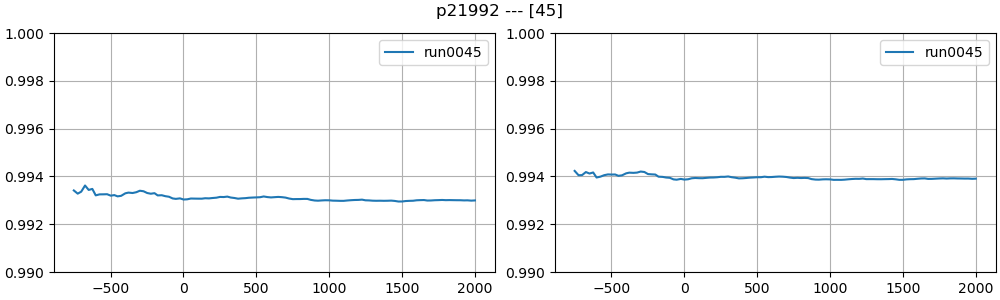

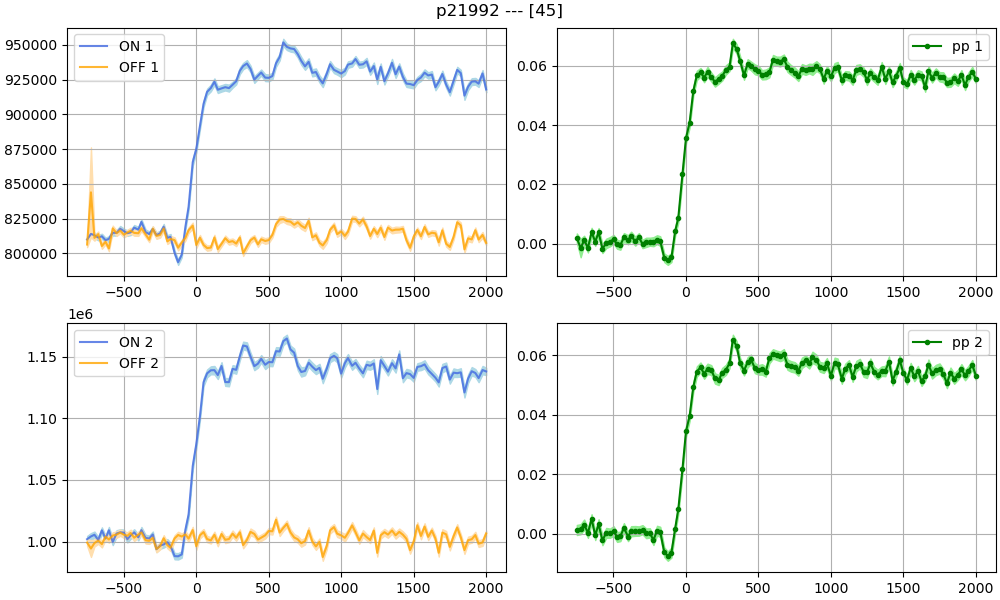

In [7]:
channel_delay_motor = channel_delay_beckhoff
detector_XAS_1 = channel_diode_1
detector_XAS_2 = channel_diode_2
detector_Izero = channel_Izero122

reducedir='../Reduced_data/All_shots/'
saveflag = True

TT = TT_PSEN126

pump_1, unpump_1, pump_2, unpump_2, Izero_pump, Izero_unpump, Delays_stage, arrTimes, Delays_corr, energy, readbacks, corr1, corr2 = \
XAS_scanPP(reducedir, saveflag, jsonlist, TT, channel_delay_motor, detector_XAS_1, detector_XAS_2, detector_Izero)

Plot_correlations(pgroup, reducedir, runlist, timescan=True)#, lowlimit = 0.5)
Plot_rawdata_2diodes(pgroup, reducedir, runlist, timescan=True)